In [2]:
import pandas as pd
df = pd.read_csv("Sales_Data[1].csv")

In [3]:
df.shape

(185950, 11)

In [4]:
df.head(3)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Day of Week'] = df['Order Date'].dt.day_name()
df['Hour'] = df['Order Date'].dt.hour
df.head(3)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Day of Week
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Monday
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Sunday
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Thursday


In [7]:
# find non_null
print(df.isnull().sum())

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
Day of Week         0
dtype: int64


In [8]:
sales_by_city = df.groupby('City')['Sales'].sum()
sales_by_Day_of_Week = df.groupby('Day of Week')['Sales'].sum()

In [9]:
print(sales_by_city)

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64


#Pie Chart

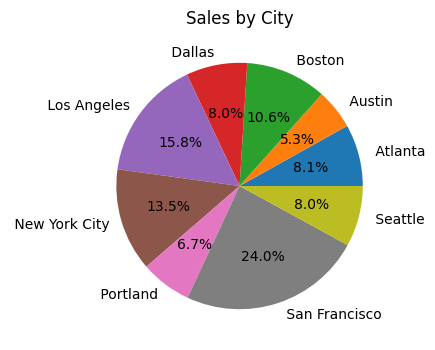

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4), dpi=100)
plt.pie(sales_by_city, labels=sales_by_city.index, autopct='%1.1f%%')
plt.title('Sales by City')
plt.show()

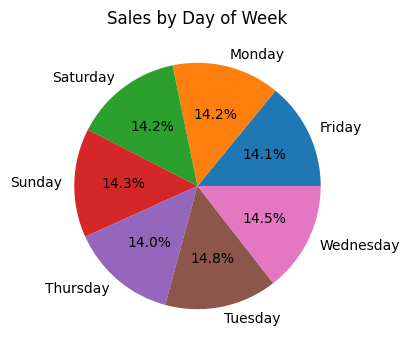

In [11]:
plt.figure(figsize=(4,4), dpi=100)
plt.pie(sales_by_Day_of_Week, labels=sales_by_Day_of_Week.index, autopct='%1.1f%%')
plt.title('Sales by Day of Week')
plt.show()

#BarChart | Stacked Bar Chart | Clusterd Bar Chart

In [12]:
PriceEach_by_product = df.groupby('Product')['Price Each'].sum()
print(PriceEach_by_product)
print("----------------------")
print(PriceEach_by_product.index)
print("----------------------")
print(PriceEach_by_product.values)

Product
20in Monitor                   451068.99
27in 4K Gaming Monitor        2429637.70
27in FHD Monitor              1125974.93
34in Ultrawide Monitor        2348718.19
AA Batteries (4-pack)           79015.68
AAA Batteries (4-pack)          61716.59
Apple Airpods Headphones      2332350.00
Bose SoundSport Headphones    1332366.75
Flatscreen TV                 1440000.00
Google Phone                  3315000.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       323787.10
Macbook Pro Laptop            8030800.00
ThinkPad Laptop               4127958.72
USB-C Charging Cable           261740.85
Vareebadd Phone                826000.00
Wired Headphones               226395.18
iPhone                        4789400.00
Name: Price Each, dtype: float64
----------------------
Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)

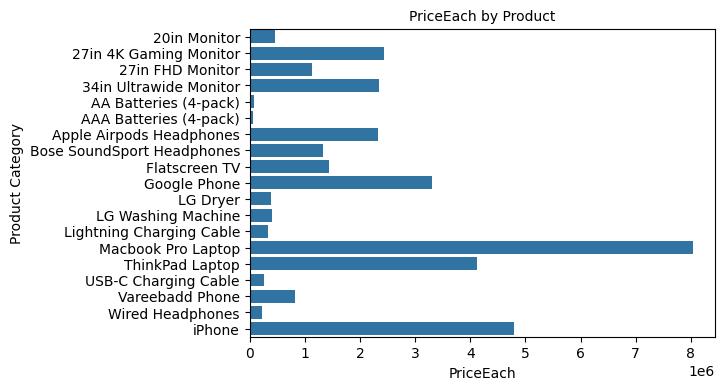

In [13]:
import seaborn as sns
plt.figure(figsize=(6,4), dpi=100)
sns.barplot(x=PriceEach_by_product.values, y=PriceEach_by_product.index, orient= 'h')
plt.title('PriceEach by Product', size=10)
plt.xlabel('PriceEach')
plt.ylabel('Product Category')
plt.show()

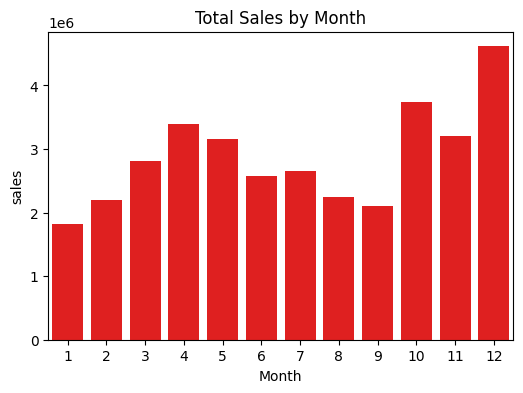

In [14]:
sales_by_month = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(6,4), dpi=100)
sns.barplot(x=sales_by_month.index, y=sales_by_month.values, orient='v', color='Red')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('sales')
plt.show()

#Histogram

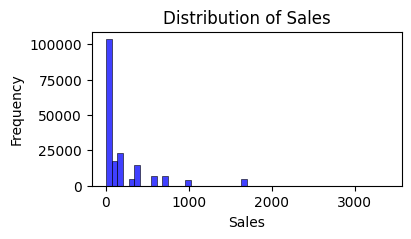

In [15]:
plt.figure(figsize=(4,2), dpi=100)
sns.histplot(df['Sales'], bins=50, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

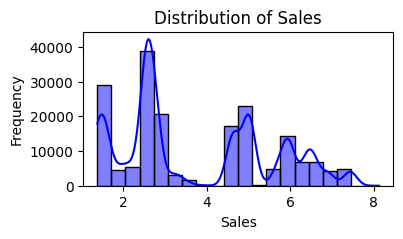

In [16]:
import numpy as np
plt.figure(figsize=(4,2), dpi=100)
sns.histplot(np.log1p(df['Sales']), bins=20, color='blue', kde=True)# log1p = log(1+x)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

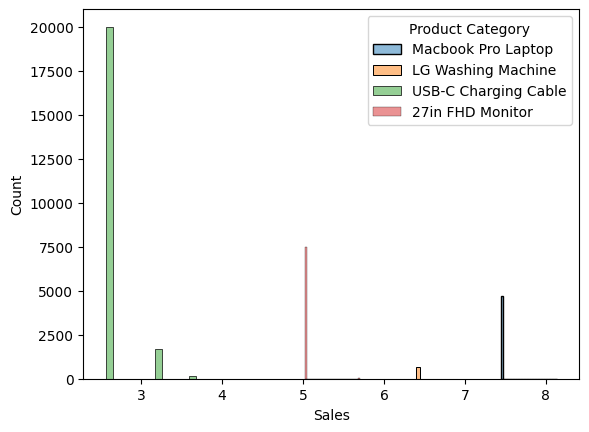

In [17]:
products = df['Product'].unique()
for product in products[0:4]:
  sns.histplot(np.log1p(df[df['Product'] == product]['Sales']), bins=20, alpha=0.5, label=product)

plt.legend(title='Product Category')


#Line Chart

In [18]:
df.set_index('Order Date', inplace=True)
monthly_df = df.resample('M').sum()

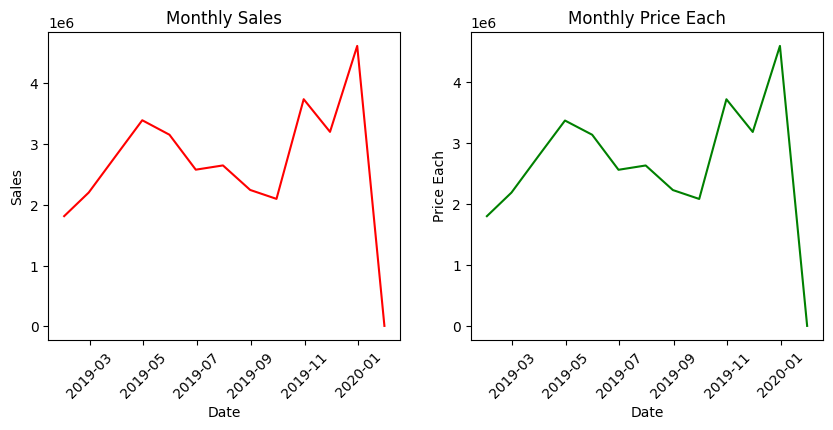

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
#Sales Plot
ax[0].plot(monthly_df.index, monthly_df['Sales'], color="red")
ax[0].set_title('Monthly Sales')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Sales')
ax[0].tick_params(axis='x', rotation=45)

#Price Each
ax[1].plot(monthly_df.index, monthly_df['Price Each'], color='g')
ax[1].set_title('Monthly Price Each')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price Each')
ax[1].tick_params(axis='x', rotation=45)


#Scatter Plot

<Axes: xlabel='Sales', ylabel='Price Each'>

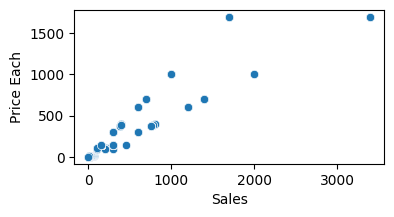

In [20]:
plt.figure(figsize=(4,2), dpi=100)
sns.scatterplot(x='Sales', y='Price Each', data=df)

##BoxPlot

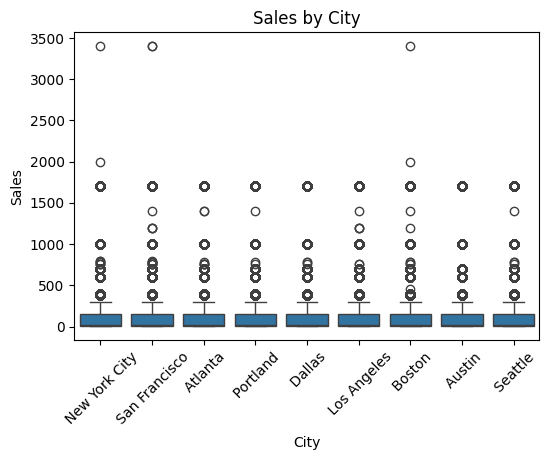

In [21]:
plt.figure(figsize=(6,4), dpi=100)
sns.boxplot(x='City', y='Sales', data=df)
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [22]:
#Checking the outliers
for k, v in df.select_dtypes(include=np.number).items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column Unnamed: 0 outliers = 0.69%
Column Order ID outliers = 0.00%
Column Quantity Ordered outliers = 100.00%
Column Price Each outliers = 19.90%
Column Month outliers = 0.00%
Column Sales outliers = 19.91%
Column Hour outliers = 0.00%


In [23]:
# Outlier Handling
columns_to_check = ['Quantity Ordered', 'Price Each', 'Sales']  # Fixed typo here
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[col].median()
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_value, df[col])

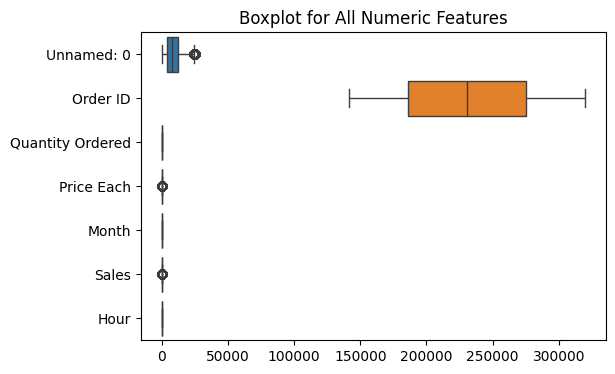

In [24]:
plt.figure(figsize=(6,4), dpi=100)
sns.boxplot(data=df.select_dtypes(include=np.number), orient="h")
plt.title('Boxplot for All Numeric Features')
plt.show()


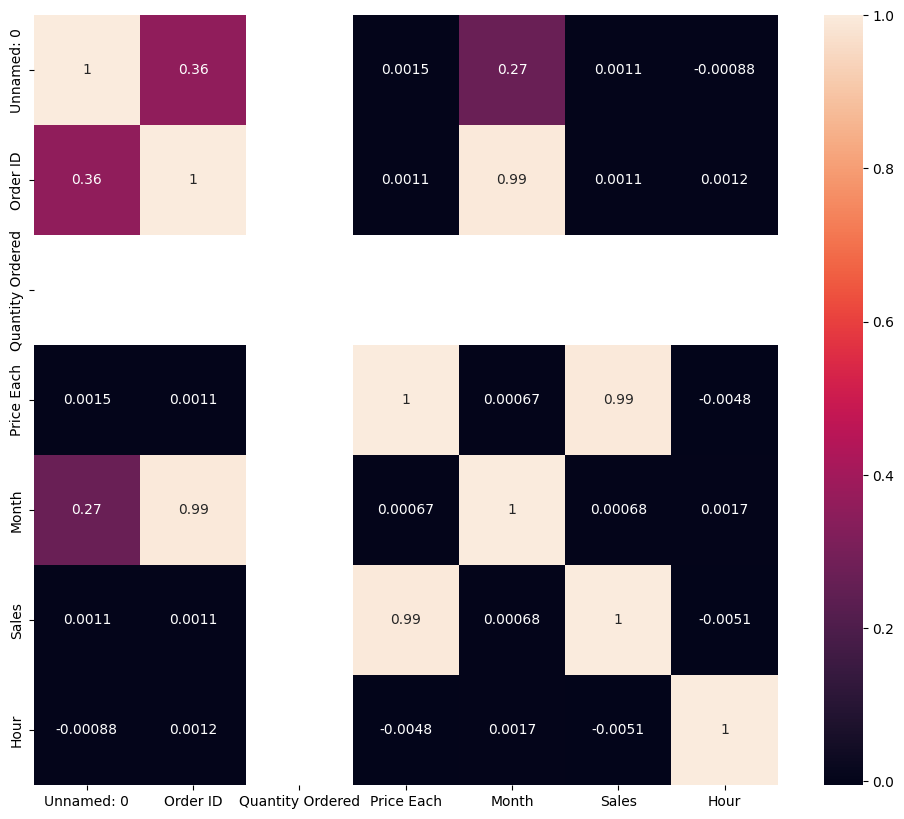

In [25]:
#corrolation data
plt.figure(figsize=(12, 10), dpi=100)
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

#LabelEncoder

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df['Product'] = le.fit_transform(df['Product'])
df['Day of Week'] = le.fit_transform(df['Day of Week'])
df['Purchase Address'] = le.fit_transform(df['Purchase Address'])
df.head(3)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Hour,Day of Week
Order Date,,,,,,,,,,,
2019-12-30 00:01:00,0,295665,13,1.0,14.95,5881,12,14.95,5,0,1
2019-12-29 07:03:00,1,295666,11,1.0,14.95,72442,12,14.95,5,7,3
2019-12-12 18:21:00,2,295667,15,1.0,11.95,27897,12,11.95,5,18,4


##Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
if 'Unnamed:0' in df.columns:
    X = df.drop(['Sales', 'Unnamed:0'], axis=1)
else:
    X = df.drop(['Sales'], axis=1)
y = df['Sales']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#MinMaxScaler

In [29]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

#LinearRegression

In [30]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train_scaled, y_train)
y_pred = LR.predict(X_test_scaled)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error", mse)
print("R2 Score", r2)
print("Mean Absolute Error", mean_absolute_error(y_test, y_pred))

Mean Squared Error 44.11780225261711
R2 Score 0.9897972441971634
Mean Absolute Error 1.5921095360422575


#Ridge

In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
print("Mean Squared Error", mean_squared_error(y_test, y_pred))
print("R2 Score", r2_score(y_test, y_pred))
print("Mean Absolute Error", mean_absolute_error(y_test, y_pred))

Mean Squared Error 44.11920209167159
R2 Score 0.989796920468072
Mean Absolute Error 1.5929394313961258


#DecisionTreeRegressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)
print("Mean Squared Error", mean_squared_error(y_test, y_pred))
print("R2 Score", r2_score(y_test, y_pred))
print("Mean Absolute Error", mean_absolute_error(y_test, y_pred))

Mean Squared Error 43.973723681046074
R2 Score 0.9898305640455489
Mean Absolute Error 1.5984695369290451


#RandomForest

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=5)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print("Mean Squared Error", mean_squared_error(y_test, y_pred))
print("R2 Score", r2_score(y_test, y_pred))
print("Mean Absolute Error", mean_absolute_error(y_test, y_pred))

Mean Squared Error 56.1812595907502
R2 Score 0.9870074291321664
Mean Absolute Error 1.7432578112397532
